# Actividad: Laboratorio. Árboles y random forest para regresión y clasificación

# Árboles y random forest para regresión


## 1.- Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta. 

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv("housing_train.csv")

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Evaluación de datos faltantes

Los valores faltantes se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:
* .isnull()
* .notnull()

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho datos faltantes.

In [0]:
missing_data = df_train.isnull()

"Verdadero" significa valor perdido, mientras que "Falso" significa valor no perdido

In [0]:
missing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


### Cantidad de valores faltantes por columna

In [0]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

### Según el resumen anterior, cada columna tiene 1460 filas de datos, 19 columnas que contienen datos faltantes:
1. LotFrontage. 259 datos faltantes
2. Alley. 1369 datos faltantes
3. MasVnrType. 8 datos faltantes
4. MasVnrArea. 8 datos faltantes
5. BsmtQual. 37 datos faltantes
6. BsmtCond. 37 datos faltantes
7. BsmtExposure. 38 datos faltantes
8. BsmtFinType1. 37 datos faltantes
9. BsmtFinType2. 38 datos faltantes
10. Electrical. 1 dato faltantes
11. FireplaceQu. 609 datos faltantes
12. GarageType. 81 datos faltantes
13. GarageYrBlt. 81 datos faltantes
14. GarageFinish. 81 datos faltantes
15. GarageQual. 81 datos faltantes
16. GarageCond. 81 datos faltantes
17. PoolQC. 1453 datos faltantes
18. Fence. 1179 datos faltantes
19. MiscFeature. 1406 datos faltantes

### ¿Cómo lidiar con los datos faltantes?

<ol>
    <li>Eliminar datos<br>
        a. Eliminar toda la fila<br>
        b. Eliminar toda la columna
    </li>
    <li>reemplazar datos<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la frecuencia<br>
        c. Reemplazar en función de otras funciones
    </li>
</ol>

### Nuestro data set de housing_train tiene 1460 filas, las columnas solo deben descartarse si la mayoría de las entradas de la columna están vacías. , En este caso serian.
1. Alley. 1369 datos faltantes
2. PoolQC. 1453 datos faltantes
3. Fence. 1179 datos faltantes
4. MiscFeature. 1406 datos faltantes

In [0]:
df_train = df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

### Tenemos cierta libertad para elegir el método para reemplazar datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Todas las columnas que sean numéricas se reemplazan por su media o promedio y las columnas categóricas por su frecuencia
1. LotFrontage. 259 datos faltantes. Reemplazar por media
2. MasVnrType. 8 datos faltantes. Reemplazar por frecuencia
3. MasVnrArea. 8 datos faltantes. Reemplazar por media
4. BsmtQual. 37 datos faltantes. Reemplazar por frecuencia
5. BsmtCond. 37 datos faltantes. Reemplazar por frecuencia
6. BsmtExposure. 38 datos faltantes. Reemplazar por frecuencia
7. BsmtFinType1. 37 datos faltantes. Reemplazar por frecuencia
8. BsmtFinType2. 38 datos faltantes. Reemplazar por frecuencia
9. Electrical. 1 dato faltantes. Reemplazar por frecuencia
10. FireplaceQu. 609 datos faltantes. Reemplazar por frecuencia
11. GarageType. 81 datos faltantes. Reemplazar por frecuencia
12. GarageYrBlt. 81 datos faltantes. Reemplazar por media
13. GarageFinish. 81 datos faltantes. Reemplazar por frecuencia
14. GarageQual. 81 datos faltantes. Reemplazar por frecuencia
15. GarageCond. 81 datos faltantes. Reemplazar por frecuencia

###  Reemplazo por el Promedio
* LotFrontage. 259 datos faltantes. Reemplazar por media
* MasVnrArea. 8 datos faltantes. Reemplazar por media
* GarageYrBlt. 81 datos faltantes. Reemplazar por media

In [0]:
avg_LotFrontage = df_train['LotFrontage'].astype('float').mean(axis=0)
df_train['LotFrontage'].replace(np.nan, avg_LotFrontage, inplace=True)

In [0]:
avg_MasVnrArea = df_train['MasVnrArea'].astype('float').mean(axis=0)
df_train['MasVnrArea'].replace(np.nan, avg_MasVnrArea, inplace=True)

In [0]:
avg_GarageYrBlt = df_train['GarageYrBlt'].astype('float').mean(axis=0)
df_train['GarageYrBlt'].replace(np.nan, avg_MasVnrArea, inplace=True)

### Reemplazo por la frecuencia
* MasVnrType. 8 datos faltantes. Reemplazar por frecuencia
* BsmtQual. 37 datos faltantes. Reemplazar por frecuencia
* BsmtCond. 37 datos faltantes. Reemplazar por frecuencia
* BsmtExposure. 38 datos faltantes. Reemplazar por frecuencia
* BsmtFinType1. 37 datos faltantes. Reemplazar por frecuencia
* BsmtFinType2. 38 datos faltantes. Reemplazar por frecuencia
* Electrical. 1 dato faltantes. Reemplazar por frecuencia
* FireplaceQu. 609 datos faltantes. Reemplazar por frecuencia
* GarageType. 81 datos faltantes. Reemplazar por frecuencia
* GarageFinish. 81 datos faltantes. Reemplazar por frecuencia
* GarageQual. 81 datos faltantes. Reemplazar por frecuencia
* GarageCond. 81 datos faltantes. Reemplazar por frecuencia

In [0]:
max_MasVnrType = df_train["MasVnrType"].value_counts().idxmax()
df_train["MasVnrType"].replace(np.nan, max_MasVnrType, inplace=True)

In [0]:
max_BsmtQual = df_train["BsmtQual"].value_counts().idxmax()
df_train["BsmtQual"].replace(np.nan, max_BsmtQual, inplace=True)

In [0]:
max_BsmtCond = df_train["BsmtCond"].value_counts().idxmax()
df_train["BsmtQual"].replace(np.nan, max_BsmtCond, inplace=True)

In [0]:
max_BsmtExposure = df_train["BsmtExposure"].value_counts().idxmax()
df_train["BsmtExposure"].replace(np.nan, max_BsmtExposure, inplace=True)

In [0]:
max_BsmtFinType1 = df_train["BsmtFinType1"].value_counts().idxmax()
df_train["BsmtFinType1"].replace(np.nan, max_BsmtFinType1, inplace=True)

In [0]:
max_BsmtFinType2 = df_train["BsmtFinType2"].value_counts().idxmax()
df_train["BsmtFinType2"].replace(np.nan, max_BsmtFinType2, inplace=True)

In [0]:
max_Electrical = df_train["Electrical"].value_counts().idxmax()
df_train["Electrical"].replace(np.nan, max_Electrical, inplace=True)

In [0]:
max_FireplaceQu = df_train["FireplaceQu"].value_counts().idxmax()
df_train["FireplaceQu"].replace(np.nan, max_FireplaceQu, inplace=True)

In [0]:
max_GarageType = df_train["GarageType"].value_counts().idxmax()
df_train["GarageType"].replace(np.nan, max_FireplaceQu, inplace=True)

In [0]:
max_GarageFinish = df_train["GarageFinish"].value_counts().idxmax()
df_train["GarageFinish"].replace(np.nan, max_GarageFinish, inplace=True)

In [0]:
max_GarageQual = df_train["GarageQual"].value_counts().idxmax()
df_train["GarageQual"].replace(np.nan, max_GarageQual, inplace=True)

In [0]:
max_GarageCond = df_train["GarageCond"].value_counts().idxmax()
df_train["GarageCond"].replace(np.nan, max_GarageCond, inplace=True)

### Comprobamos si existen valores faltantes

In [0]:
missing_data = df_train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1460
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: int64

OverallCond
False    1460
Name: OverallCond, dtype: int64

YearBuilt


In [0]:
df_train_regresion = df_train.copy()

##  2.- De las variables numéricas hallar el valor mínimo, el máximo, la mediana y la media

In [0]:
df_train_regresion.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1874.492128,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,429.989247,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,103.685262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.- De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

In [0]:
var_num = df_train_regresion._get_numeric_data().columns.values.tolist()

In [0]:
data_vars = df_train_regresion.columns.values.tolist()

In [0]:
to_keep = [v for v in data_vars if v not in var_num]

In [0]:
for v in to_keep:
    print(v)
    print(df_train_regresion[v].value_counts())
    print("__________________________________")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
__________________________________
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
__________________________________
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
__________________________________
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
__________________________________
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
__________________________________
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
__________________________________
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
__________________________________
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAm

## 4.- Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos

In [0]:
var_num = df_train_regresion._get_numeric_data().columns.values.tolist()

In [0]:
df_train_regresion[var_num].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013489,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080750,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.100432,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072515,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.290467,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.007410,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.274269,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.148142,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.134442,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.116264,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

Por defecto muestra la correlación de Pearson entre las columnas.  Se puede observar cómo la diagonal es 1, ya que cada columna está (obviamente) completamente correlacionada consigo misma.

In [0]:
df_train_regresion[var_num].corr(method='spearman')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.031453,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.034283,-0.013038,-0.006736,-0.009509,-0.033187,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,0.025888,-0.013644,0.005258,0.013301,0.006505,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.269075,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.024083,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.047139,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.031453,-0.269075,1.000000,0.569523,0.244943,-0.076010,0.192037,0.104973,0.256149,0.151932,0.049954,0.098650,0.354222,0.391146,0.054435,-0.032726,0.342936,0.086115,-0.005091,0.205452,0.102804,0.290326,-0.011166,0.325041,0.234926,0.147146,0.336004,0.352273,0.108396,0.162896,-0.099207,0.050414,0.040225,0.078489,0.021113,0.021978,0.006911,0.390963
LotArea,-0.005364,-0.269570,0.569523,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177362,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.098498,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.244943,0.233303,1.000000,-0.177521,0.647392,0.557723,0.414777,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.640449,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.076010,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.180592,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.338010,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.192037,0.103385,0.647392,-0.416964,1.000000,0.684388,0.403643,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.864371,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.104973,0.075158,0.557723,-0.041464,0.684388,1.000000,0.236305,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.684189,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.034283,0.024083,0.256149,0.177362,0.414777,-0.180592,0.403643,0.236305,1.000000,0.242913,-0.062494,0.075557,0.360865,0.352106,0.063106,-0.107316,0.323396,0.123061,0.031891,0.291670,0.169976,0.112291,-0.047588,0.263282,0.254547,0.341352,0.402380,0.365483,0.171672,0.209741,-0.178777,0.040343,0.037134,0.004495,-0.051014,0.018286,0.000853,0.422884
BsmtFinSF1,-0.013038,-0.107629,0.151932,0.171995,0.132957,-0.011087,0.189645,0.063353,0.242913,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.114258,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.

Correlación por en método de Spearman

## 5.- Determinar el conjunto de modelización y el de validación. 

### Conversión de las variables categóricas a dummies (variables ficticias)

In [0]:
data_vars = df_train_regresion.columns.values.tolist()
to_keep = [v for v in data_vars if v not in ["Id"]]
df_train_regresion = df_train_regresion[to_keep]

Se elimina la columna Id ya que no posee información relevante para la predicción

In [0]:
var_num = df_train_regresion._get_numeric_data().columns.values.tolist()
data_vars = df_train_regresion.columns.values.tolist()
categories  = [v for v in data_vars if v not in var_num]

In [0]:
for category in categories:
    cat_dummies = pd.get_dummies(df_train_regresion[category], prefix=category)
    data_new = df_train_regresion.join(cat_dummies)
    df_train_regresion = data_new 

In [0]:
df_train_regresion.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Gd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#### Se eliminan las columnas de las variables categóricas, elaboramos el modelo con las columnas dummies creadas

In [0]:
data_vars = df_train_regresion.columns.values.tolist()  
new_categories  = [v for v in data_vars if v not in categories]
df_train_regresion = df_train_regresion[new_categories]

In [0]:
df_train_regresion

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Gd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Se elimina una columna por cada variable ficticia correspondiente a las variables categóricas. Para evitar los problemas de multicolinealidad

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras incluidas en el modelo están correlacionadas con otras variables predictoras. La multicolinealidad severa es problemática, porque puede incrementar la varianza de los coeficientes de regresión, haciéndolos inestables.


In [0]:
new_categories = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'Street_Grvl',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'CentralAir_N',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'FireplaceQu_Ex',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageCond_Ex',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'PavedDrive_N',
 'PavedDrive_P',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal']

In [0]:
df_train_regresion = df_train_regresion[new_categories]

## 6.-  Predicción para el árbol de regresión  

In [0]:
y = df_train_regresion['SalePrice']

In [0]:
x = df_train_regresion[[v for v in df_train_regresion.columns.values.tolist() if v not in ["SalePrice"]]]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [0]:
predictors = x_train.columns.values.tolist()

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [0]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
preds = regtree.predict(x_test)

## 7.- Para el ejercicio de regresión hallar valores como el error cuadrático medio o su raíz cuadrada.

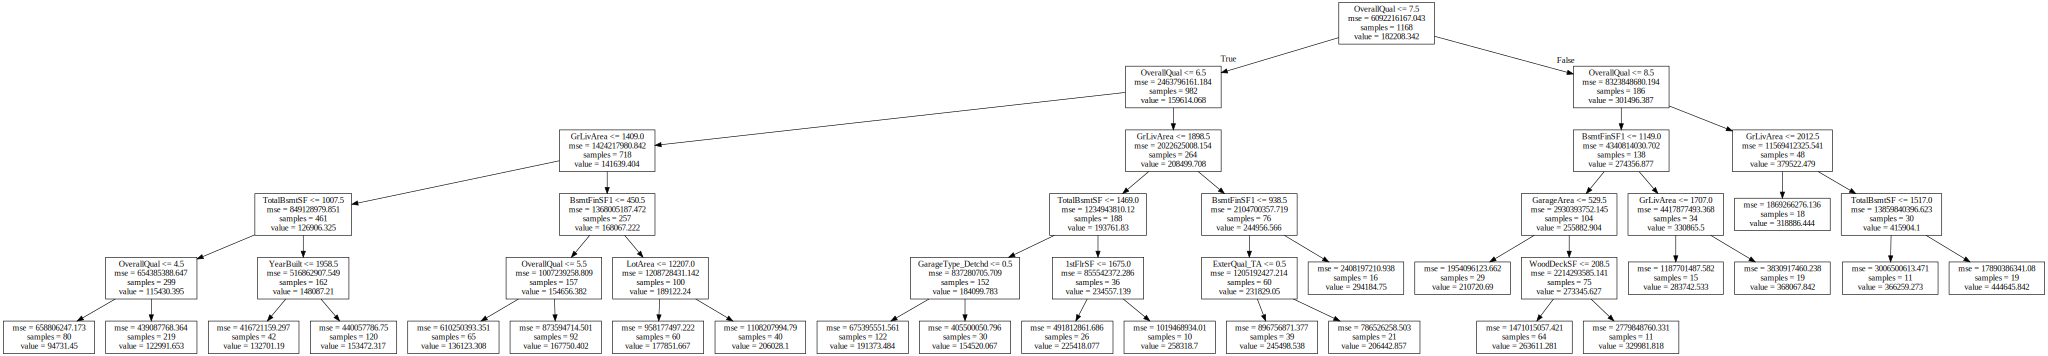

In [0]:
from sklearn.tree import export_graphviz
with open("tree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("tree.dot", "r")
text = file.read()
Source(text)

## R cuadrado

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)

In [0]:
scores = cross_val_score(regtree, x_test, y_test, scoring="r2", cv = cv, n_jobs=1)

In [0]:
print(scores)

[0.72765366 0.75890808 0.64183035 0.81274237 0.84191732 0.64928271
 0.69549978 0.77485498 0.62063381 0.66146733]


In [0]:
score = np.mean(scores)
print(score)

0.7184790383865166


## Importancia de las variables 

In [0]:
list(zip(predictors,regtree.feature_importances_))

[('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.003291687955855956),
 ('OverallQual', 0.7756229755105261),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0023188411107951928),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.045909453565171204),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.039555289581746055),
 ('1stFlrSF', 0.0013505618375046148),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.10139166290477843),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.014169545078337589),
 ('WoodDeckSF', 0.007143276137266473),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('MSZoning_C (all)', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoni

## 8.- Predicción para los bosques aleatorios de regresión

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regforest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10000)
regforest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
preds = regforest.predict(x_test)

In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)

In [0]:
scores = cross_val_score(regforest, x_test, y_test, scoring="r2", cv = cv, n_jobs=1)

In [0]:
print(scores)

[0.85183179 0.92058267 0.88679465 0.93737235 0.90338307 0.81463021
 0.77795019 0.88967012 0.75519803 0.82051645]


In [0]:
score = np.mean(scores)
print(score)

0.8557929520748162


In [0]:
list(zip(predictors,regforest.feature_importances_))

[('MSSubClass', 0.0017137726771209855),
 ('LotFrontage', 0.0074574928663737865),
 ('LotArea', 0.02008832103033051),
 ('OverallQual', 0.5356989522062656),
 ('OverallCond', 0.004559806877035687),
 ('YearBuilt', 0.012759066572385808),
 ('YearRemodAdd', 0.008425791527944353),
 ('MasVnrArea', 0.006076757964139632),
 ('BsmtFinSF1', 0.03026148987708412),
 ('BsmtFinSF2', 0.0006334417269175977),
 ('BsmtUnfSF', 0.00595133071921888),
 ('TotalBsmtSF', 0.036785468025413486),
 ('1stFlrSF', 0.030514915574098682),
 ('2ndFlrSF', 0.013138274556544347),
 ('LowQualFinSF', 8.707517415736919e-05),
 ('GrLivArea', 0.1066187669542656),
 ('BsmtFullBath', 0.0011111854517057442),
 ('BsmtHalfBath', 0.0011594199234593887),
 ('FullBath', 0.00946885782198628),
 ('HalfBath', 0.0009009797955254736),
 ('BedroomAbvGr', 0.001717538328169662),
 ('KitchenAbvGr', 0.0007625852345418787),
 ('TotRmsAbvGrd', 0.011322789134008701),
 ('Fireplaces', 0.0027534981900235772),
 ('GarageYrBlt', 0.007093867589925734),
 ('GarageCars', 0.0

# Árboles y random forest para clasificación

In [0]:
df_train_clasification = df_train_regresion.copy()

In [0]:
df_train_clasification.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_N,PavedDrive_P,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 1.- Para el ejercicio de clasificación tanto para Árboles como para Random Forest crea los siguientes grupos: grupo1 SalePrice menor o igual a 100 000, grupo2 SalePrice entre 101 000 y 500 000 y grupo3 SalePrice mayor o igual a 501 000. 

In [0]:
conditions = [
    (df_train_clasification['SalePrice'] <= 100000),
    (df_train_clasification['SalePrice'] > 100000) & (df_train_clasification['SalePrice'] <= 500000),
    (df_train_clasification['SalePrice'] > 501000)]
choices = ['grupo1','grupo2','grupo3']

In [0]:
df_train_clasification['SalePrice_Grupo'] = np.select(conditions, choices, default='null')

In [0]:
df_train_clasification = df_train_clasification.drop(['SalePrice'], axis=1)

## 2.- Predicción para el árbol de clasificación

In [0]:
y = df_train_clasification['SalePrice_Grupo']
x = df_train_clasification[[v for v in df_train_clasification.columns.values.tolist() if v not in ["SalePrice_Grupo"]]]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
predictors = x_train.columns.values.tolist()

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clastree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
clastree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [0]:
preds = clastree.predict(x_test)

## Matriz de confusión 


In [0]:
pd.crosstab(y_test, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,grupo1,grupo2,grupo3
Actual,,,
grupo1,12,20,0
grupo2,8,248,2
grupo3,0,1,1


## Visualización del árbol de decisión

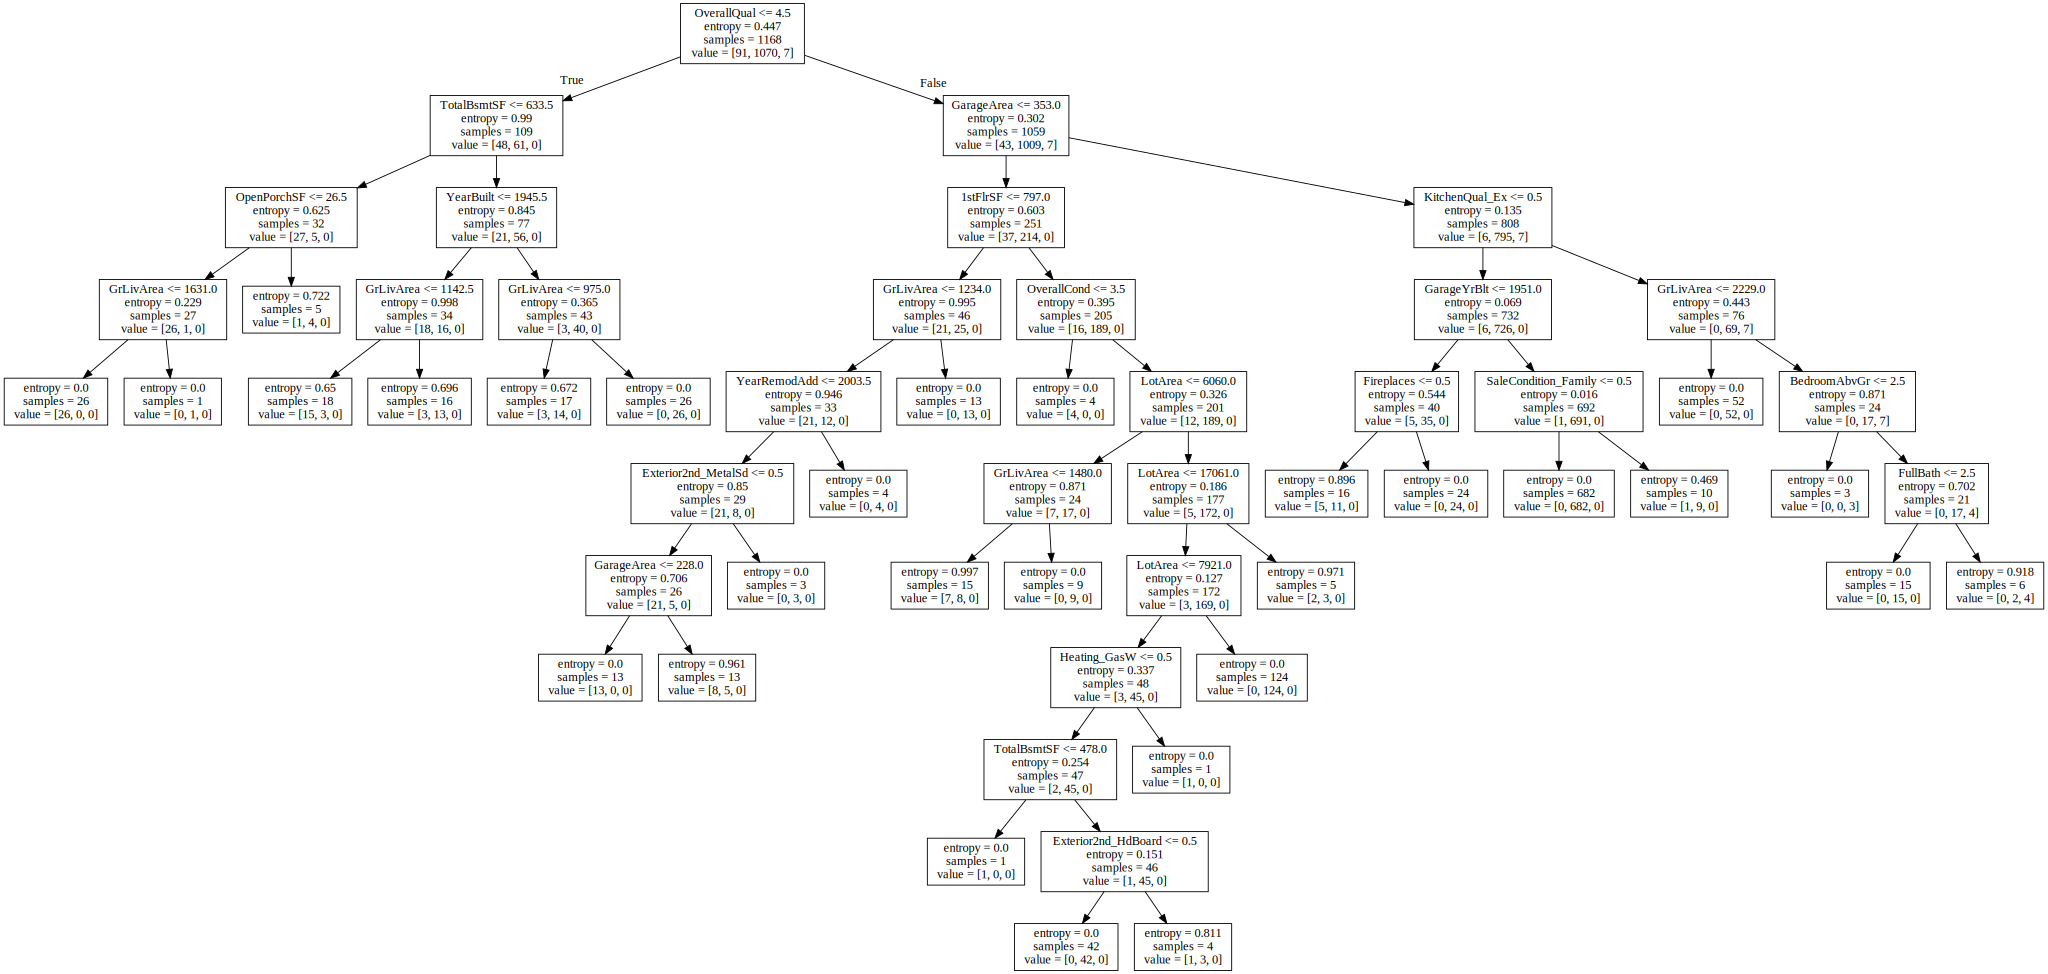

In [0]:
from sklearn.tree import export_graphviz
with open("tree_clas.dot", "w") as dotfile:
    export_graphviz(clastree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("tree_clas.dot", "r")
text = file.read()
Source(text)

## Cross Validation

In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)

In [0]:
scores = cross_val_score(clastree, x_test, y_test, scoring="accuracy", cv = cv, n_jobs=1)

In [0]:
print(scores)

[0.9        0.93333333 1.         0.86206897 0.96551724 0.93103448
 0.89655172 0.93103448 0.93103448 0.89655172]


In [0]:
score = np.mean(scores)
print(score)

0.924712643678161


## 3.- Predicción para los bosques aleatorios de clasificación

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clasforest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

In [0]:
clasforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
preds = clasforest.predict(x_test)

In [0]:
pd.crosstab(y_test, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,grupo1,grupo2
Actual,,
grupo1,17,15
grupo2,1,257
grupo3,0,2


In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)

In [0]:
scores = cross_val_score(clasforest, x_test, y_test, scoring="accuracy", cv = cv, n_jobs=1)

In [0]:
print(scores)

[0.9        0.93333333 0.93103448 0.96551724 0.93103448 0.89655172
 0.86206897 0.96551724 0.93103448 0.86206897]


In [0]:
score = np.mean(scores)
print(score)

0.917816091954023


# 	Comente las ventajas y desventajas de cada modelo. De acuerdo con los resultados, son realmente útiles los modelos creados para el conjunto de datos propuesto o es mejor investigar otros algoritmos. 

Los bosques aleatorios hacen mejor trabajo al predecir ya que promedian los resultados del conjunto de árboles porque tienen en cuenta la decisión de la mayoría por voto, porque funcionan mejor?, es simple porque al ir tomando más y más modelos en consideración se maximiza la reducción de la varianza, donde la varianza queda dividida por raíz de n donde n es el número de árboles que se utilizan y por tanto al tomar una muestra aleatoria simple de valores y al ir creando árboles y arboles al final el hecho de que puedas crear un mal árbol queda compensado por la mejoría en el resto de árboles y el error va quedando dividido al ir metiendo más y más árboles en el bosque , también al tomar una muestra aleatoria simple de variables predictoras para crear el árbol hace que cada árbol sean independiente de los demás, random forest es un algoritmo donde todas las variables de un set de datos son utilizadas óptimamente, en la gran mayoría de algoritmos de machine learning buscamos las variables que sean más importantes para hacer una predicción sin embargo en el caso de un random forest como la selección es aleatoria en las variables al final resulta que las prediciones que lleva a cabo cada árbol se calculan en base a particiones locales, donde algunas de las variables no son importantes en forma global, pero se convierten en significantes en el árbol que se utilizan de modo que así en combinación cada variable saca a relucir todo su potencial, es una técnica donde todo el set de datos se optimiza en forma global y se acaba tomado en cuenta en la generación del bosque esto ayuda a reducir el sesgo que suele aparecer  cuando existe la dependencia de un par de las variables predictoras que acaban dominando por encima del resto como sucede en los árboles de decisión y de regresión.


# Predicción con LightGBM de Microsoft
LightGBM es un marco de aumento de gradiente que utiliza algoritmos de aprendizaje basados ​​en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas:
* Mayor velocidad de entrenamiento y mayor eficiencia.
* Menor uso de memoria.
* Mejor precisión
* Soporte de aprendizaje paralelo y GPU.
* Capaz de manejar datos a gran escala.


In [0]:
!pip install lightgbm

## Regresión

In [0]:
import lightgbm as ltb

In [0]:
 regmodel = ltb.LGBMRegressor()

In [0]:
y = df_train_regresion['SalePrice']
x = df_train_regresion[[v for v in df_train_regresion.columns.values.tolist() if v not in ["SalePrice"]]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
predictors = x_train.columns.values.tolist()

In [0]:
regmodel.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
preds = regmodel.predict(x_test)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
scores = cross_val_score(regmodel, x_test, y_test, scoring="r2", cv = cv, n_jobs=1)
print(scores)

[0.84807587 0.85375899 0.88608379 0.91048377 0.86788185 0.68778298
 0.68059126 0.87879263 0.69750205 0.89443298]


In [0]:
score = np.mean(scores)
print(score)

0.8205386151532265


## Clasificación

In [0]:
y = df_train_clasification['SalePrice_Grupo']
x = df_train_clasification[[v for v in df_train_clasification.columns.values.tolist() if v not in ["SalePrice_Grupo"]]]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
predictors = x_train.columns.values.tolist()

In [0]:
 clasmodel = ltb.LGBMClassifier()    

In [0]:
clasmodel.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
preds = clasmodel.predict(x_test)

In [0]:
pd.crosstab(y_test, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,grupo1,grupo2,grupo3
Actual,,,
grupo1,22,10,0
grupo2,4,253,1
grupo3,0,2,0


In [0]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
scores = cross_val_score(clasmodel, x_test, y_test, scoring="accuracy", cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[0.96666667 0.93333333 0.96551724 0.96551724 0.96551724 0.93103448
 0.82758621 0.93103448 0.93103448 0.89655172]
0.9313793103448275


Este algoritmo es mucho más rápido que los bosques aleatorios esta implementado de una manera sencilla, sin ajustar hiper parámetros, ya que me falta estudiarlo más, lo que si pude notar es su velocidad y presión en comparación a los bosques y arboles aleatorios  